# Import libs

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme()

# Load dataset

In [85]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
data = california.frame

print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


# Preprocess

In [86]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split data

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate

In [89]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.5558915986952444
R2 Score: 0.5757877060324508


# Visualize

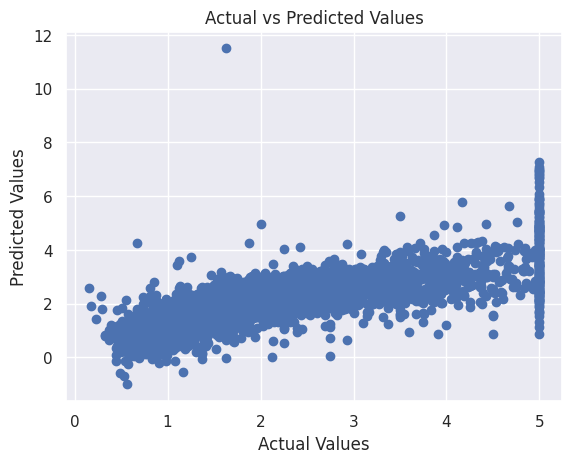

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Feature engineering

We can add new features to the dataset to improve the performance of the model.
In this example, we will add two new features: `RoomsPerBedroom` and `PopulationDensity`.

In [91]:
data['RoomsPerBedroom'] = data['AveRooms'] / data['AveBedrms']
data['PopulationDensity'] = data['Population'] / data['AveOccup']

data['LogMedHouseVal'] = np.log(data['MedHouseVal'])
data['LogPopulation'] = np.log(data['Population'] + 1) 

# Re-train

In [92]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

# Evaluate after feature engineering

In [93]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.11634141773144319
R2 Score: 0.9112174751064201


# Visualize after feature engineering

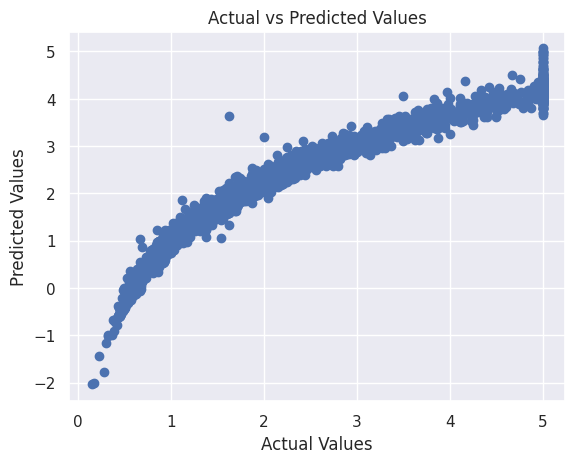

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()